# Partie 1 : Principe

In [2]:
# Le type de modèle 
from sklearn.linear_model import LinearRegression

## Instanciation du modèle après entrainement

Dans le code ci-dessous,  clf  est le modèle instancié, qui est entraîné sur les données  X  et  y.  
Par souci de simplicité on parlera de modèle dans les 2 cas, classe et instance, mais il est bon de souligner la différence.

In [3]:
# Utilisation de la méthode fit pour entraîner le modèle
X = [[0, 0], [1, 1]]
y = [0, 1]

# l'instanciation du modèle
mdl = LinearRegression()
mdl = mdl.fit(X, y)

mdl

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
import pandas as pd
import numpy as np      
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from itables import show
import itables.options as opt

# Partie 2 : Fonctions de base d'un modèle prédictif

## Evaluer la performance d'un modèle 

In [5]:
df = pd.read_csv("/Users/tiffanierazanahita/Documents/GitHub/test/Python/age_vs_poids_vs_taille_vs_sexe.csv")

Nous allons construire un modèle qui prédit la variable cible (le poids de l'enfant) à partir des autres variables (sexe, âge et taille). 
Voici un exemple où on ne considère que les variables de sexe et d'âge. Votre mission consiste à ajouter la variable de taille.

In [6]:
# Principales statistiques du dataframe dans itables
show(df.describe(), max_rows=10, max_cols=10)

/opt/homebrew/lib/python3.11/site-packages/itables/typing.py:201: SyntaxWarning: These arguments are not documented in ITableOptions: {'max_rows', 'max_cols'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/itables/typing.py:201: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'max_rows', 'max_cols'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


Loading ITables v2.4.2 from the internet... (need help?)


### Entrainons le modèle à une regression linéaire

In [7]:
# Les variables prédictives
X = df[['sexe', 'age']]

# La variable cible
y = df.poids

# Choix du modèle 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Entrainer revient à appliquer la méthode fit
reg.fit(X, y)

# On obtient un score. 
print(f"R^2 : {np.round(reg.score(X, y), 3)}")

# Ainsi que les coefficients a, b, c de la régression linéaire
print(f"poids = {np.round(reg.coef_[0], 3)} * sexe + {np.round(reg.coef_[1], 3)} * age + {np.round(reg.intercept_, 3)}")

R^2 : 0.416
poids = -2.059 * sexe + 0.304 * age + -3.011


### Entrainons le modèle 

Avec toutes les variables prédictives disponibles : age, taille et sexe

In [8]:
# Les variables prédictives
X = df[['sexe', 'age', 'taille']]

# La variable cible
y = df.poids

# Choix du modèle 
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()

# Entrainer revient à appliquer la méthode fit
reg2.fit(X, y)

# On obtient un score. 
print(f"R^2 : {np.round(reg2.score(X, y), 3)}")

# Ainsi que les coefficients a, b, c de la régression linéaire
print(f"poids = {np.round(reg2.coef_[0], 3)} * sexe + {np.round(reg2.coef_[1], 3)} * age + {np.round(reg2.intercept_, 3)}")

R^2 : 0.631
poids = 0.153 * sexe + 0.108 * age + -58.296


### Prédiction du poids pour des nouveaux échantillons

Le modèle permet maintenant de prédire la valeur cible (poids) en fonction de nouvelles données d'entrée.

Par exemple, quel poids est prédit par la première regression poids ~ sexe + age pour un garçon agé de 150 mois ?


In [9]:
# Prédiction à l'aide du modèle à 2 variables : sexe et age
# poids pour un homme de taille = 150
reg.predict(np.array([[0, 150]]))

# Prédiction à l'aide du modèle à 3 variables : sexe, age et taille
reg2.predict(np.array([[0, 250, 170]]))

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62.95302878])

### Performance du modèle

In [10]:
# les predictions sur tous les échantillons du dataset

y_pred = reg.predict(df[['sexe', 'age']])
y_pred2 = reg2.predict(df[['sexe', 'age', 'taille']])

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
print("1er Modele: poids ~ sexe + age")
print(f"\tmean_squared_error(y, y_pred): {mean_squared_error(y, y_pred)}")
print(f"\tmean_absolute_error(y, y_pred): {mean_absolute_error(y, y_pred)}")
print(f"\tmean_absolute_percentage_error(y, y_pred): {mean_absolute_percentage_error(y, y_pred)}")
print(f"\tR^2: {reg.score(df[['sexe', 'age']], y)}")
print()

print("2eme Modele: poids ~ sexe + age + taille")
print(f"\tmean_squared_error(y, y_pred): {mean_squared_error(y, y_pred2)}")
print(f"\tmean_absolute_error(y, y_pred): {mean_absolute_error(y, y_pred2)}")
print(f"\tmean_absolute_percentage_error(y, y_pred): {mean_absolute_percentage_error(y, y_pred2)}")
print(f"\tR^2: {reg2.score(df[['sexe', 'age', 'taille']], y)}")

1er Modele: poids ~ sexe + age
	mean_squared_error(y, y_pred): 45.17470814507523
	mean_absolute_error(y, y_pred): 5.219181502513357
	mean_absolute_percentage_error(y, y_pred): 0.11643376955710255
	R^2: 0.4163752740762817

2eme Modele: poids ~ sexe + age + taille
	mean_squared_error(y, y_pred): 28.59911226330148
	mean_absolute_error(y, y_pred): 4.163592104513333
	mean_absolute_percentage_error(y, y_pred): 0.09053096861870077
	R^2: 0.6305200466878815


## Principe de la regression linéaire

200 échantillons sur le budget alloué aux publicités télévisées, à la radio et dans les journaux, ainsi que les ventes résultantes

In [11]:
df = pd.read_csv("/Users/tiffanierazanahita/Documents/GitHub/test/Python/advertising.csv")
df.describe()

,tv,radio,journaux,ventes
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


/opt/homebrew/lib/python3.11/site-packages/seaborn/regression.py:255: RuntimeWarning: divide by zero encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/opt/homebrew/lib/python3.11/site-packages/seaborn/regression.py:255: RuntimeWarning: overflow encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/opt/homebrew/lib/python3.11/site-packages/seaborn/regression.py:255: RuntimeWarning: invalid value encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/opt/homebrew/lib/python3.11/site-packages/seaborn/regression.py:255: RuntimeWarning: divide by zero encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/opt/homebrew/lib/python3.11/site-packages/seaborn/regression.py:255: RuntimeWarning: overflow encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/opt/homebrew/lib/python3.11/site-packages/seaborn/regression.py:255: RuntimeWarning: invalid value encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/opt/homebrew/lib/python3.11/site-packages/seaborn/regression.py:2


Coefficient de corrélation entre ventes et tv : 0.7822244248616064
Coefficient de corrélation entre ventes et radio : 0.5762225745710553
Coefficient de corrélation entre ventes et journaux : 0.22829902637616536


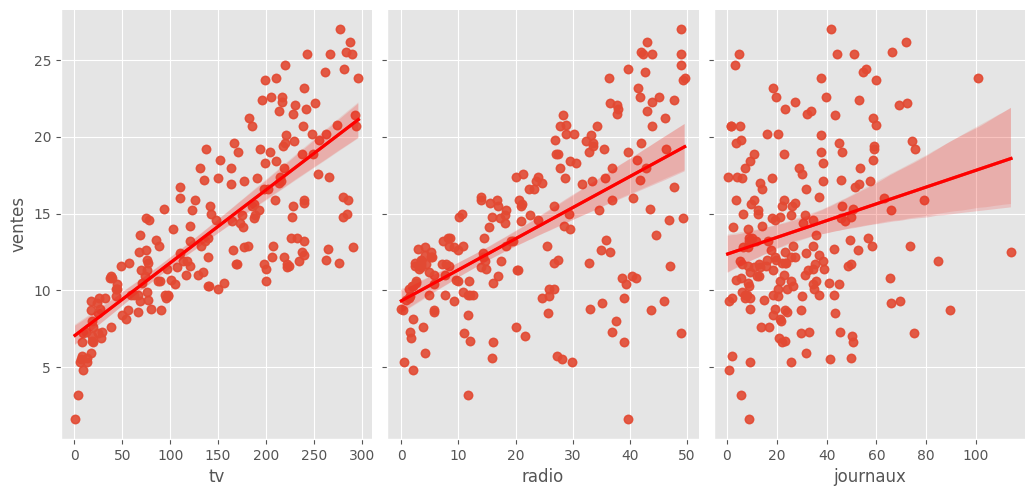

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 

# On analyse les données pour voir si elles sont corrélées et de quelle manière
regplot = sns.pairplot(df, x_vars=['tv', 'radio', 'journaux'], y_vars='ventes', height=5, aspect=0.7, kind='reg')
# On ajoute une courbe de régression
regplot.map(sns.regplot, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

print("")
# afficher le coefficient de corrélation
print("Coefficient de corrélation entre ventes et tv :", df['ventes'].corr(df['tv']))
print("Coefficient de corrélation entre ventes et radio :", df['ventes'].corr(df['radio']))
print("Coefficient de corrélation entre ventes et journaux :", df['ventes'].corr(df['journaux']))

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

from sklearn.model_selection import train_test_split
# On sépare les données en train et test
X = df[['tv', 'radio', 'journaux']]
y = df['ventes']

# On réserve 20% pour le test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
reg.fit(X_train, y_train)

# Pour estimer la performance sur le sous-ensemble de test, 
# il faut tout d'abord obtenir les prédictions pour X_train
y_pred_test = reg.predict(X_test)

# On calcule les indicateurs de performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
print("Performance sur le sous-ensemble de test :")
print(f"\tR^2 : {r2_score(y_test, y_pred_test)}")
print(f"\tmean_squared_error : {mean_squared_error(y_test, y_pred_test)}")
print(f"\tmean_absolute_error : {mean_absolute_error(y_test, y_pred_test)}")
print(f"\tmean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, y_pred_test)}")

Performance sur le sous-ensemble de test :
	R^2 : 0.899438024100912
	mean_squared_error : 3.174097353976105
	mean_absolute_error : 1.4607567168117606
	mean_absolute_percentage_error : 0.1519884660283123


Une MAPE proche de 0 est plutot bon signe. Mais est-ce qu'un autre modèle serait mieux ?   

### Fonction quadratique

En analysant les données sur le nuage de point, on remarque parfois que des fonctions autres que linéaires sont plus appropriées. Mais si certaines variables suivent une fonction quadratique par exemple, l'amplitude sera bien différente. 

=> On doit normaliser la variable. 

In [15]:
# Création de la variable tv2 pour la régression polynomiale
df['tv2'] = df['tv'] ** 2

# On importe la bibliothèque pour la normalisation
from sklearn.preprocessing import MinMaxScaler

Normalisation détaillée

In [16]:
# 1. Instantier le scaler
scaler = MinMaxScaler()
# 2. Le fit() sur les données (le scaler calcule les min et max)
scaler.fit(df)
# 3. On transforme les données. La méthode transform() retourne un array (un array est un tableau de valeurs)
df_array = scaler.transform(df)
# 4. On peut convertir l'array en dataframe
df_normal = pd.DataFrame(df_array, columns=['tv', 'radio', 'journaux', 'ventes', 'tv2'])

Les étapes 3 et 4 peuvent être concentrées en utilisant la méthode  fit_transform()  , ce qui donne :

In [17]:
scaler = MinMaxScaler()
df_normal = scaler.fit_transform(df)
df = pd.DataFrame(df_normal, columns=['tv', 'radio', 'journaux', 'ventes', 'tv2'])

df.describe().loc[['min', 'max']]

,tv,radio,journaux,ventes,tv2
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


Maintenant que la régression est polynomiale grâce au terme tv2, on peut entrainer le modèle.

In [18]:
X = df[['tv', 'radio', 'journaux', 'tv2']]
y = df['ventes']

from sklearn.linear_model import LinearRegression   
# on sépare les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entrainement du modèle
reg.fit(X_train, y_train)
# Prédiction sur le sous-ensemble de test
y_hat_test = reg.predict(X_test)

# Indicateurs de performance
print("Performance sur le sous-ensemble de test :")
print(f"Coeffcicients : {reg.coef_}")
print(f"Intercept : {reg.intercept_}")
print(f"R^2 : {r2_score(y_test, y_hat_test)}")
print(f"mean_squared_error : {mean_squared_error(y_test, y_hat_test)}")
print(f"mean_absolute_error : {mean_absolute_percentage_error(y_test, y_hat_test)}")

Performance sur le sous-ensemble de test :
Coeffcicients : [ 0.88007136  0.37464292  0.02197664 -0.36578279]
Intercept : -0.007609223962456557
R^2 : 0.9246499904798063
mean_squared_error : 0.003686398861606461
mean_absolute_error : 0.16200182799935664


X = df